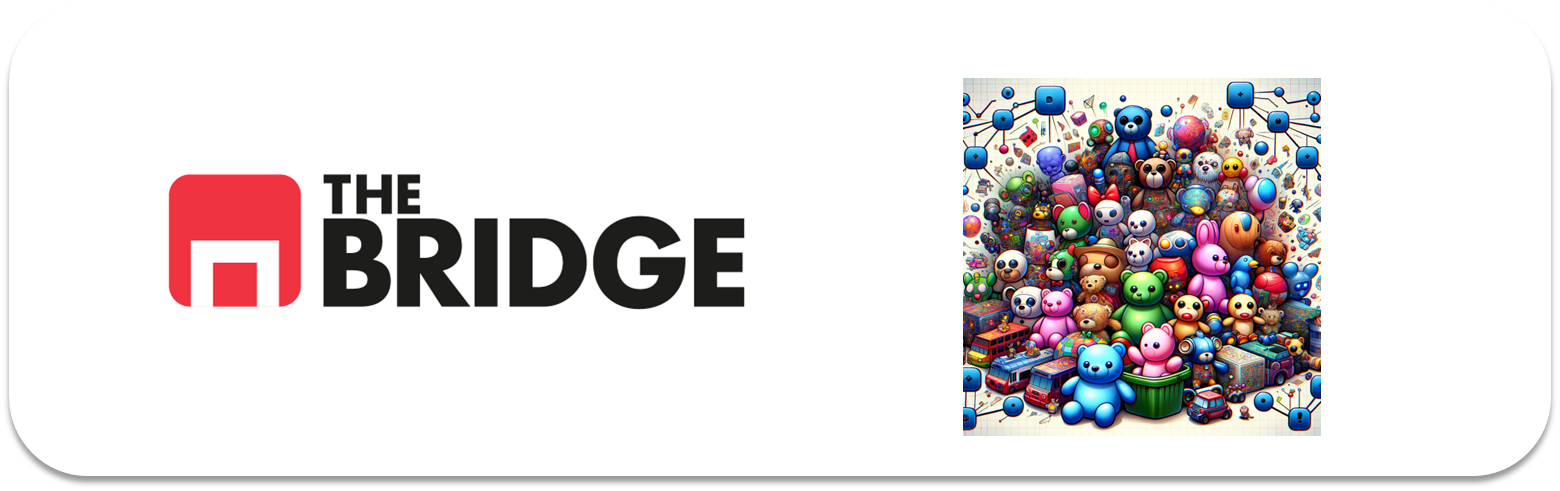

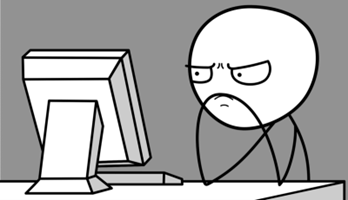

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [194]:
import pandas as pd
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Toolbox_datascience as tds
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix)


In [195]:
importlib.reload(tds)

<module 'Toolbox_datascience' from 'c:\\Users\\rodri\\Git_Repositories\\ONLINE_DS_THEBRIDGE_ROD\\Sprint_13\\Unidad_01\\Practica_Obligatoria\\Toolbox_datascience.py'>

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [196]:
from sklearn.datasets import fetch_olivetti_faces

# Cargar el conjunto de datos de Olivetti Faces
olivetti_faces = fetch_olivetti_faces()

# Mostrar la descripción del conjunto de datos
print(olivetti_faces.DESCR)


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [197]:
# Mostrar el target (etiquetas)
print("Target (etiquetas) del conjunto de datos:")
print(olivetti_faces.target)

# Crear un DataFrame con las imágenes y el target
# Las imágenes son matrices de 64x64 píxeles, las convertimos en una lista de arrays
X_df = pd.DataFrame(olivetti_faces.data)
X_df['target'] = olivetti_faces.target  # Añadir el target al DataFrame

# Reordenar aleatoriamente las filas del DataFrame
X_shuffled_df = X_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Ver las primeras filas del DataFrame reordenado
print("\nDataFrame con imágenes y target reordenados aleatoriamente:")
X_shuffled_df.head()


Target (etiquetas) del conjunto de datos:
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909,20
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744,28
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975,3
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859,21
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405,9


### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [198]:
from sklearn.model_selection import train_test_split

# Paso 1: Dividir en conjunto de entrenamiento (80%) y conjunto de prueba (20%) con estratificación
X_train, X_temp, y_train, y_temp = train_test_split(X_df.drop('target', axis=1), 
                                                    X_df['target'], 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=X_df['target'])

# Paso 2: Dividir el conjunto temporal en validación (10%) y prueba (10%) con estratificación
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
                                                test_size=0.5,  # El 10% del total (0.5 * 20% = 10%)
                                                random_state=42, 
                                                stratify=y_temp)

# Mostrar tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (320, 4096)
Tamaño del conjunto de validación: (40, 4096)
Tamaño del conjunto de prueba: (40, 4096)


### #1.4

Crea los pares X,y para train, validation y test.

In [199]:
# Crear los pares (X, y) para los conjuntos de entrenamiento, validación y prueba
X_train, y_train = X_train, y_train
X_val, y_val = X_val, y_val
X_test, y_test = X_test, y_test

# Verificar los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento X:", X_train.shape)
print("Tamaño del conjunto de validación X:", X_val.shape)
print("Tamaño del conjunto de prueba X:", X_test.shape)
print("Tamaño del conjunto de entrenamiento y:", y_train.shape)
print("Tamaño del conjunto de validación y:", y_val.shape)
print("Tamaño del conjunto de prueba y:", y_test.shape)


Tamaño del conjunto de entrenamiento X: (320, 4096)
Tamaño del conjunto de validación X: (40, 4096)
Tamaño del conjunto de prueba X: (40, 4096)
Tamaño del conjunto de entrenamiento y: (320,)
Tamaño del conjunto de validación y: (40,)
Tamaño del conjunto de prueba y: (40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [200]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

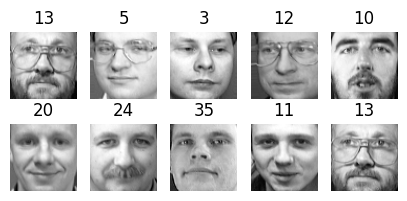

In [201]:
plot_faces(X_train.iloc[:10].values, y_train.iloc[:10].values)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [202]:
from sklearn.decomposition import PCA

# Aplicamos PCA con 99% de varianza explicada
pca = PCA(0.99)

# Transformar los datos de entrenamiento, validación y prueba
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Ver cuántos componentes se han retenido
print(f'Número de componentes retenidos: {pca.n_components_}')


Número de componentes retenidos: 222


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

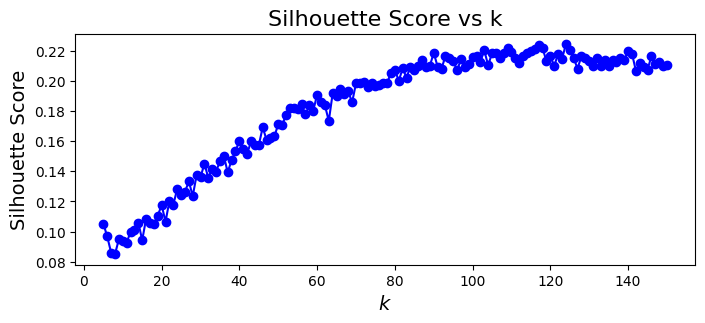

El mejor valor de k es: 124


In [203]:
def best_k_silhouette(X, k_range=(5, 151, 1)):
    """
    Encuentra el mejor valor de k para K-Means basado en la puntuación de silueta.
    
    Parámetros:
    X (array-like): Datos a clusterizar.
    k_range (tuple): Rango de valores de k a evaluar, con paso de 5.
    
    Retorna:
    - El valor de k que da el mejor Silhouette Score.
    - La lista de puntuaciones de Silueta para cada k.
    """
    
    # Inicialización
    k_values = range(k_range[0], k_range[1], k_range[2])  # Rango de k (de 5 en 5)
    silhouette_scores = []
    
    # Iterar sobre cada k
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=25)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    
    # Encontrar el k con el mejor Silhouette Score
    best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
    
    # Graficar Silhouette Score vs k
    plt.figure(figsize=(8, 3))
    plt.plot(k_values, silhouette_scores, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette Score", fontsize=14)
    plt.title("Silhouette Score vs k", fontsize=16)
    plt.show()

    return best_k, silhouette_scores

# Ejecutar la función con el conjunto de datos reducido
best_k, silhouette_scores = best_k_silhouette(X_train_pca, k_range=(5, 151, 1))

# Imprimir el mejor valor de k
print(f"El mejor valor de k es: {best_k}")



### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

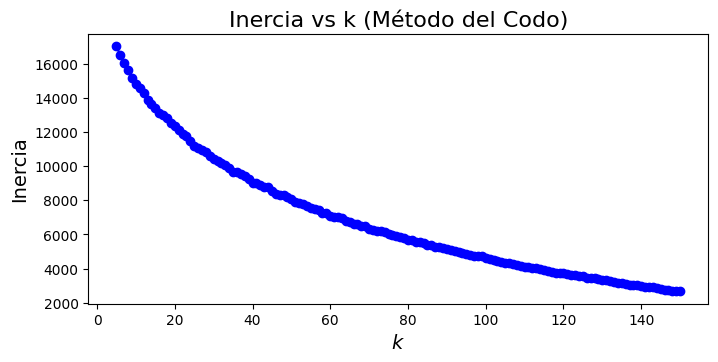

In [204]:
def elbow_method(X, k_range=(5, 151, 1)):
    """
    Evalúa el método del codo (inercia) para diferentes valores de k y grafica los resultados.
    
    Parámetros:
    X (array-like): Datos a clusterizar.
    k_range (tuple): Rango de valores de k a evaluar (de 5 en 5).
    
    Retorna:
    - El valor de k que corresponde al codo.
    - Lista de inercias para cada k.
    """
    
    # Inicialización
    k_values = range(k_range[0], k_range[1], k_range[2])  # Rango de k (de 5 en 5)
    inertias = []
    
    # Iterar sobre cada k
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=25)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    # Graficar Inercia vs k
    plt.figure(figsize=(8, 3.5))
    plt.plot(k_values, inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inercia", fontsize=14)
    plt.title("Inercia vs k (Método del Codo)", fontsize=16)
    plt.show()
    
    # Determinar el "codo" visualmente (se observa donde la pendiente de la curva se estabiliza)
    return k_values, inertias

# Ejecutar el método del codo sobre el conjunto de entrenamiento reducido
k_values, inertias = elbow_method(X_train_pca, k_range=(5, 151, 1))


### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [205]:
best_model = KMeans(n_clusters=124, random_state=42, n_init=25)
best_model.fit(X_train_pca)

KMeans(n_clusters=124, n_init=25, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

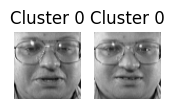

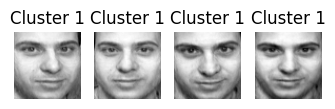

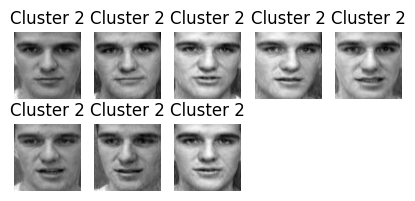

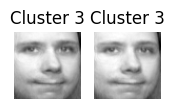

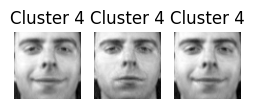

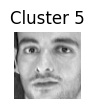

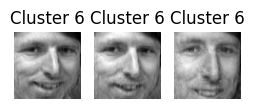

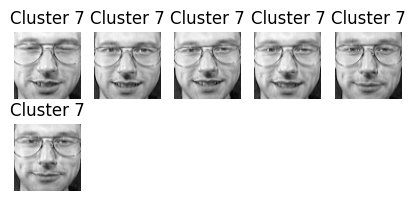

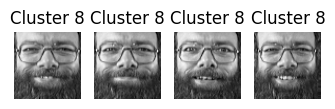

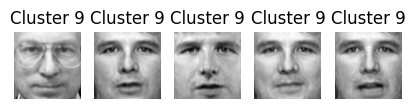

In [206]:
# Paso 1: Obtener las etiquetas de los clústeres
labels = best_model.labels_

# Paso 2: Recuperar las características originales de las imágenes
# Hacemos uso de la inversa de PCA para transformar los datos de vuelta al espacio original
X_train_original = pca.inverse_transform(X_train_pca)

# Paso 3: Visualizar las imágenes asignadas a los primeros 10 clústeres
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(f"Cluster {label}")
    plt.show()

# Paso 4: Recorremos los clústeres y pintamos las caras para los primeros 10 clústeres
for cluster_id in range(10):  # Primeros 10 clústeres
    cluster_faces = X_train_original[labels == cluster_id]
    cluster_labels = labels[labels == cluster_id]
    plot_faces(cluster_faces, cluster_labels)


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

Accuracy: 0.9500
Precision: 0.9250
Recall: 0.9500
F1-Score: 0.9333
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


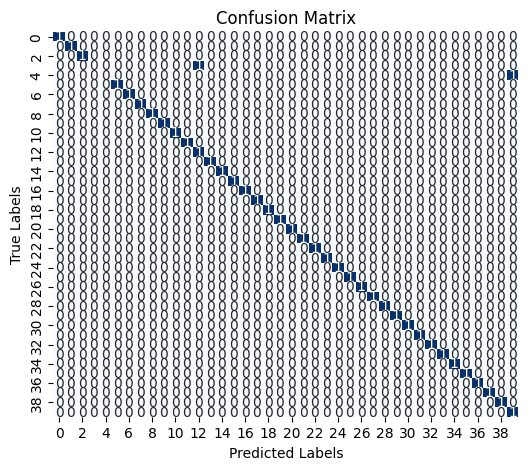

In [207]:
rdf = RandomForestClassifier(n_estimators=150, random_state=42)
rdf.fit(X_train, y_train)

# Predicciones
y_pred_valid = rdf.predict(X_test)

# 1. Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred_valid)
print(f'Accuracy: {accuracy:.4f}')

# 2. Precisión (Precision) - para multiclass
precision = precision_score(y_test, y_pred_valid, average='macro')  # Cambié 'average' para manejar multiclase
print(f'Precision: {precision:.4f}')

# 3. Recall (Sensibilidad) - para multiclass
recall = recall_score(y_test, y_pred_valid, average='macro')  # Cambié 'average' para manejar multiclase
print(f'Recall: {recall:.4f}')

# 4. F1-Score - para multiclass
f1 = f1_score(y_test, y_pred_valid, average='macro')  # Cambié 'average' para manejar multiclase
print(f'F1-Score: {f1:.4f}')

# 5. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_valid)
print('Confusion Matrix:')
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7750
Precision: 0.6750
Recall: 0.7750
F1-Score: 0.7083


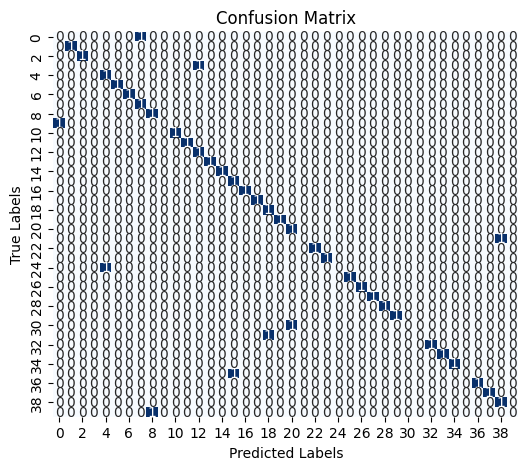

In [208]:
# 1. Transformar los datos usando K-Means
X_train_reduced = best_model.transform(X_train_pca)  
X_val_reduced = best_model.transform(X_val_pca)  

# 2. Entrenar el modelo RandomForest con los datos reducidos
rdf_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
rdf_reduced.fit(X_train_reduced, y_train)

# 3. Hacer predicciones en el conjunto de validación reducido
y_pred_valid_reduced = rdf_reduced.predict(X_val_reduced)

# 4. Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred_valid_reduced)
precision = precision_score(y_val, y_pred_valid_reduced, average='macro')
recall = recall_score(y_val, y_pred_valid_reduced, average='macro')
f1 = f1_score(y_val, y_pred_valid_reduced, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# 5. Matriz de Confusión
conf_matrix = confusion_matrix(y_val, y_pred_valid_reduced)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)